#Classification - Logistic Regression - Sentiment Classification of Comments

In [134]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns

# this allows plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
# Read the test and training data. Here, header=0 indicates that the first line of the file contains column names, 
# delimiter=\t indicates that the fields are separated by tabs, and quoting=3 tells Python to ignore doubled quotes, 
# otherwise we may encounter errors trying to read the file.
train_data_df  = pd.read_table('UMICH_SI650_train_data.txt', names=['sentiment', 'comment'], header=None, delimiter="\t", quoting=3)
test_data_df  = pd.read_table('UMICH_SI650_test_data.txt', names=['comment'], header=None, delimiter="\t", quoting=3)

In [136]:
train_data_df.head(5)

,sentiment,comment
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [137]:
train_data_df.tail(5)

,sentiment,comment
7081,0,Brokeback Mountain was boring.
7082,0,So Brokeback Mountain was really depressing.
7083,0,"As I sit here, watching the MTV Movie Awards, ..."
7084,0,Ok brokeback mountain is such a horrible movie.
7085,0,"Oh, and Brokeback Mountain was a terrible movie."


In [138]:
# no sentiment classification column should be here
test_data_df.head(5)

,comment
0,""" I don't care what anyone says, I like Hillar..."
1,have an awesome time at purdue!..
2,"Yep, I'm still in London, which is pretty awes..."
3,"Have to say, I hate Paris Hilton's behavior bu..."
4,i will love the lakers.


In [139]:
# Inspect how many are positive sentiment and how many are negative
train_data_df.sentiment.value_counts()

1    3995
0    3091
Name: sentiment, dtype: int64

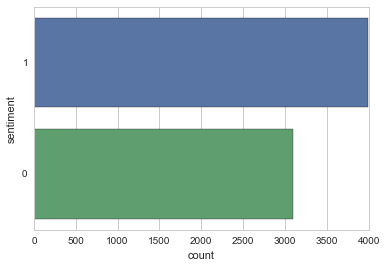

In [140]:
sns.countplot(y='sentiment', data=train_data_df);

In [141]:
# let's calculate the average number of words per sentence.
np.mean([len(s.split(" ")) for s in train_data_df.comment])

10.886819079875812

### Preparing a corpus

Here we will be using here is called a **bag-of-words** model. In this kind of model we simplify documents to a multi-set of terms frequencies. That means that, for our model, a document sentiment tag will depend on what words appear in that document, discarding any grammar or word order but keeping multiplicity.

In [142]:
import re, nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [143]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [144]:
def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # stem
    stems = stem_tokens(tokens, stemmer)
    return stems

In [145]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(analyzer = 'word', tokenizer=tokenize, lowercase=True, stop_words='english', max_features=100)
tfidf_vect = TfidfVectorizer(analyzer = 'word', tokenizer=tokenize, lowercase=True, stop_words='english', max_features=100)

In [146]:
# The method fit_transform does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms corpus data into feature vectors.
comment_tf = count_vect.fit_transform(train_data_df.comment.tolist() + test_data_df.comment.tolist())
comment_tfidf = tfidf_vect.fit_transform(train_data_df.comment.tolist() + test_data_df.comment.tolist())

In [147]:
# Numpy arrays are easy to work with, so convert the result to an array
comment_tf_nd = comment_tf.toarray()
comment_tf_nd.shape

(40138, 100)

In [148]:
comment_tfidf_nd = comment_tfidf.toarray()
comment_tfidf_nd.shape

(40138, 100)

In [190]:
# Take a look at how the Document Term Matrix looks
df = pd.DataFrame(comment_tf_nd, columns=count_vect.get_feature_names())
df.head(5)

,aaa,airlin,amaz,angelina,awesom,beauti,becaus,big,boston,brokeback,...,toyota,ucla,ve,vinci,wa,want,way,whi,work,world
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [150]:
# Take a look at how the Document Term TF-IDF looks
pd.DataFrame(comment_tfidf_nd, columns=tfidf_vect.get_feature_names()).head(5)

,aaa,airlin,amaz,angelina,awesom,beauti,becaus,big,boston,brokeback,...,toyota,ucla,ve,vinci,wa,want,way,whi,work,world
0,0,0,0,0,0.391915,0,0,0,0,0,...,0,0,0.000000,0.442325,0.000000,0,0,0,0,0
1,0,0,0,0,0.000000,0,0,0,0,0,...,0,0,0.384539,0.310766,0.272612,0,0,0,0,0
2,0,0,0,0,0.000000,0,0,0,0,0,...,0,0,0.000000,0.421036,0.000000,0,0,0,0,0
3,0,0,0,0,0.000000,0,0,0,0,0,...,0,0,0.000000,0.421036,0.000000,0,0,0,0,0
4,0,0,0,0,0.000000,0,0,0,0,0,...,0,0,0.000000,0.421333,0.000000,0,0,0,0,0


In [151]:
# let's look at the words in the vocabulary
vocab = count_vect.get_feature_names()
print(vocab)

['aaa', 'airlin', 'amaz', 'angelina', 'awesom', 'beauti', 'becaus', 'big', 'boston', 'brokeback', 'car', 'citi', 'clinton', 'code', 'cool', 'crappi', 'cruis', 'd', 'da', 'doe', 'don', 'drive', 'francisco', 'friend', 'fuck', 'fun', 'geico', 'god', 'good', 'got', 'great', 'guy', 'ha', 'harri', 'harvard', 'hate', 'hi', 'hilton', 'honda', 'imposs', 'joli', 'just', 'know', 'laker', 'left', 'like', 'littl', 'london', 'look', 'lot', 'love', 'm', 'macbook', 'make', 'miss', 'mission', 'mit', 'mountain', 'movi', 'na', 'need', 'new', 'oh', 'onli', 'pari', 'peopl', 'person', 'potter', 'pretti', 'purdu', 'realli', 'right', 'rock', 's', 'said', 'san', 'say', 'school', 'seattl', 'shanghai', 'shitti', 'stori', 'stupid', 'suck', 't', 'thi', 'thing', 'think', 'time', 'tom', 'toyota', 'ucla', 've', 'vinci', 'wa', 'want', 'way', 'whi', 'work', 'world']


In [177]:
# We can also print the counts of each word in the vocabulary as follows.
# Sum up the counts of each vocabulary word
dist = np.sum(comment_tf_nd, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the data set
for tag, count in zip(vocab, dist):
    print (tag, count)

aaa 1179
airlin 396
amaz 485
angelina 1765
awesom 3170
beauti 2146
becaus 1694
big 411
boston 2190
brokeback 2000
car 363
citi 423
clinton 396
code 2003
cool 481
crappi 412
cruis 2031
d 439
da 2087
doe 373
don 411
drive 433
francisco 1926
friend 477
fuck 452
fun 366
geico 1085
god 386
good 773
got 571
great 1178
guy 396
ha 776
harri 2094
harvard 2103
hate 4492
hi 794
hilton 2086
honda 2192
imposs 1098
joli 1764
just 1054
know 896
laker 2019
left 425
like 4080
littl 507
london 2233
look 811
lot 421
love 10334
m 1568
macbook 1059
make 631
miss 1098
mission 1101
mit 1340
mountain 2081
movi 1207
na 400
need 1220
new 459
oh 551
onli 674
pari 2094
peopl 1018
person 454
potter 2093
pretti 405
purdu 1167
realli 2126
right 661
rock 475
s 3914
said 495
san 2038
say 627
school 417
seattl 2019
shanghai 1189
shitti 378
stori 467
stupid 2886
suck 4614
t 1455
thi 1705
thing 662
think 1524
time 781
tom 2117
toyota 2028
ucla 2008
ve 774
vinci 2001
wa 3703
want 1656
way 932
whi 547
work 512
world 377


In [153]:
# split Train and Validation Data Set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(comment_tf_nd[0:len(train_data_df)], train_data_df.sentiment, train_size=0.75, random_state=1, stratify=train_data_df.sentiment)

### A bag-of-words Linear Classifier

In [154]:
#from sklearn.feature_selection import SelectKBest, chi2
#ch2 = SelectKBest(chi2, 100)
#X_train = ch2.fit_transform(X_train, y_train)
#X_test = ch2.transform(X_test)

In [155]:
#vocab_chi2 = [vocab[i] for i in ch2.get_support(indices=True)]
#print(vocab_chi2)

In [156]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression Classifier
log_tf_model = LogisticRegression()
log_tf_model = log_model.fit(X=X_train, y=y_train)

In [157]:
# Now we use the classifier to label our evaluation set. We can use either predict for classes or predict_proba for probabilities.
y_pred = log_tf_model.predict(X=X_test)
y_pred_prob = log_tf_model.predict_proba(X=X_test)[:,1]

In [160]:
#calculates several types of (predictive) scores on a classification model
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       773
          1       0.99      0.99      0.99       999

avg / total       0.99      0.99      0.99      1772



In [161]:
print("accuracy: %0.6f" % metrics.accuracy_score(y_test, y_pred))

accuracy: 0.985892


In [162]:
fpr_tf, tpr_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc_tf = metrics.auc(fpr_tf, tpr_tf)

### A TF-IDF Linear Classifier

In [164]:
# split Train and Validation Data Set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(comment_tfidf_nd[0:len(train_data_df)], train_data_df.sentiment, train_size=0.75, random_state=1, stratify=train_data_df.sentiment)

In [165]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression Classifier
log_tfidf_model = LogisticRegression()
log_tfidf_model = log_tfidf_model.fit(X=X_train, y=y_train)

In [166]:
# Now we use the classifier to label our evaluation set. We can use either predict for classes or predict_proba for probabilities.
y_pred = log_tfidf_model.predict(X=X_test)
y_pred_prob = log_tfidf_model.predict_proba(X=X_test)[:,1]

In [167]:
#calculates several types of (predictive) scores on a classification model
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       773
          1       0.98      0.99      0.99       999

avg / total       0.98      0.98      0.98      1772



In [168]:
print("accuracy: %0.6f" % metrics.accuracy_score(y_test, y_pred))

accuracy: 0.983634


In [ ]:
fpr_tfidf, tpr_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc_tfidf = metrics.auc(fpr_tfidf, tpr_tfidf)

### A Selected Words Linear Classifier

In [211]:
# find some good and bad words
selected_words = ['awesom', 'good', 'great', 'like', 'shitti', 'stupid', 'suck']
sum_data = dict()
for word in selected_words:
    sum_data[word] = df[word].sum()
sum_data

{'awesom': 3170,
 'good': 773,
 'great': 1178,
 'like': 4080,
 'shitti': 378,
 'stupid': 2886,
 'suck': 4614}

In [206]:
df_subset = df[selected_words]
X_train, X_test, y_train, y_test  = train_test_split(df_subset[0:len(train_data_df)], train_data_df.sentiment, train_size=0.75, random_state=1, stratify=train_data_df.sentiment)

In [208]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression Classifier
log_sw_model = LogisticRegression()
log_sw_model = log_tfidf_model.fit(X=X_train, y=y_train)

y_pred = log_sw_model.predict(X=X_test)
y_pred_prob = log_sw_model.predict_proba(X=X_test)[:,1]

In [209]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.58      0.73       773
          1       0.75      1.00      0.86       999

avg / total       0.86      0.81      0.80      1772



In [210]:
print("accuracy: %0.6f" % metrics.accuracy_score(y_test, y_pred))

accuracy: 0.814898


In [212]:
fpr_sw, tpr_sw, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc_sw = metrics.auc(fpr_sw, tpr_sw)

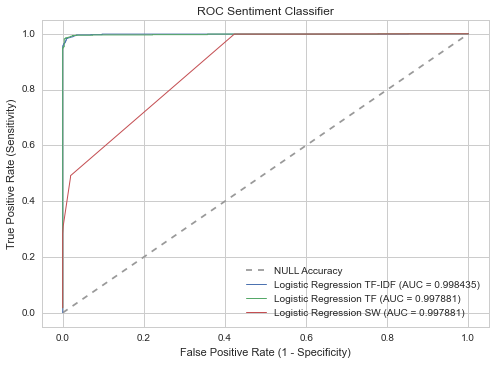

In [213]:
# ROC curves of both the Classifiers
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_tf)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

### Predict Unlabelled test data and review

In [171]:
# get predictions
test_pred = log_tfidf_model.predict(comment_tfidf_nd[len(train_data_df):])

In [172]:
# let's sample some of them
import random
spl = random.sample(range(len(test_pred)), 15)

for text, sentiment in zip(test_data_df.comment[spl], test_pred[spl]):
    print(sentiment, text)

0 then again i hate tom cruise..
1 i might get a job at state farm till school starts back which would be awesome!
0 The citizens and government of San Francisco are still stupid, but at least they can legally defend themselves...
1 And Tom Cruise is beautiful....
0 mostly these stupid guys with their shitty honda civics trying to sup them up like they are badass.
0 All san Francisco has are shitty little old apts in this price range...
0 The Harvard-Yale study was depressing, she says, " but my thought was,'I'm not a statistic.
0 Which makes me think I need AAA more than AA...
1 Boston is pretty awesome...
0 The Lakers can suck me...
1 I think Angelina Jolie is so much more beautiful than Jennifer Anniston, who, by the way, is majorly OVERRATED.
0 went to the wrong club ata..
0 i think if i hate boston, ill just disappear to california for the summers...
1 i love mit boys..................
0 i hate the lakers..
